<a href="https://colab.research.google.com/github/rajanbhusal/Makemore/blob/main/building_makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
words = open('names.txt','r').read().splitlines()



In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

In [ ]:
#bigram language model- working to predict next character from given one

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs,chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram,0) + 1


In [ ]:
sorted(b.items(),key= lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [2]:
import torch

In [ ]:
N = torch.zeros((27,27),dtype=torch.int32)

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [ ]:


for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] +=1

In [4]:
itos = {i:s for s,i in stoi.items()}

(-0.5, 26.5, 26.5, -0.5)

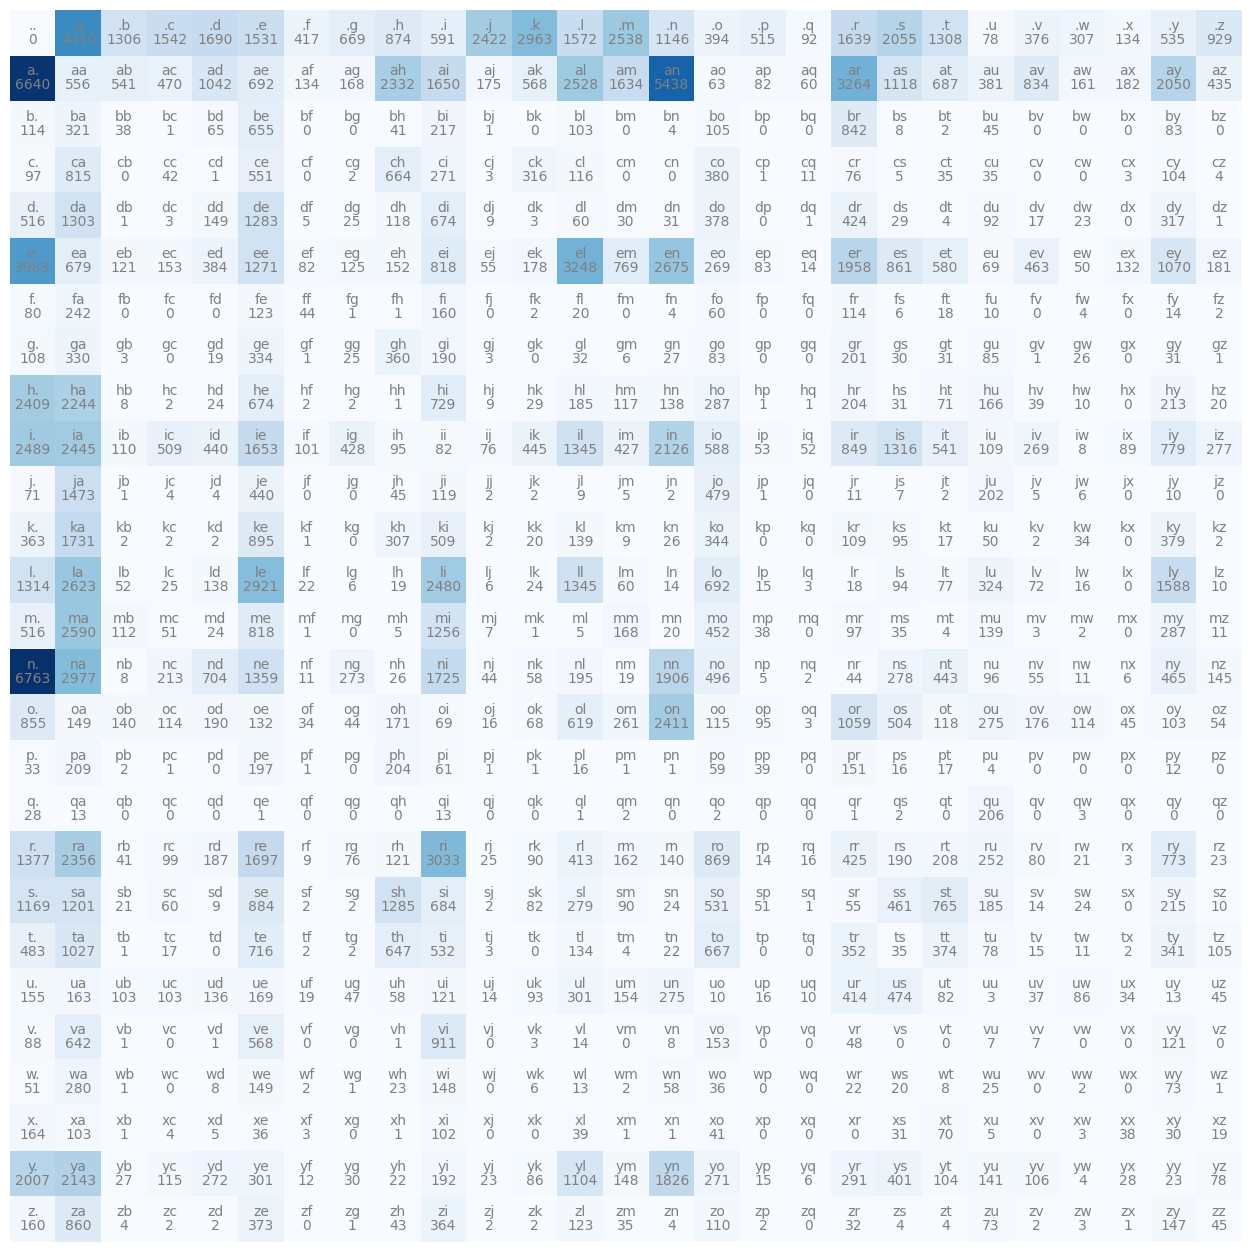

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
    plt.text(j,i,N[i,j].item(),ha="center",va="top",color="gray")
plt.axis('off')

In [ ]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
#convert raw counts into probabilities
p = N[0].float() #to normalize these counts
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g = torch.Generator().manual_seed(214748365000)
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g)
ix

tensor([11])

In [ ]:
0#sample from this distribution
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p,num_samples=20,replacement=True,generator=g)


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
P = (N+1).float()
P /= P.sum(1,keepdim=True) #check broadcasting
P[0].sum()

tensor(1.)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
  out = []

  ix = 0
  while True:
    p = P[ix]
    # p= N[ix].float()
    # p = p/p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [ ]:
log_likelihood = 0.0
n=0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n +=1
    # print(f'{ch1}{ch2}: {prob:.4f} {logprob: .4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [ ]:
#neural net approach
#create training set of all the bigrams,(x,y)
xs,ys = [],[]
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


In [ ]:
W = torch.randn((27,27),generator=g,requires_grad=True)

In [ ]:
import torch.nn.functional as F
for k in range(100):
  xenc = F.one_hot(xs,num_classes=27).float()
  logits = xenc @ W #log-counts
  counts = logits.exp() #equivalent N
  probs = counts/counts.sum(1,keepdim=True)
  loss = -probs[torch.arange(len(xs)),ys].log().mean()
  print(loss.item())
  #backward pass
  W.grad = None
  loss.backward()
  W.data += -0.5 * W.grad


3.8279035091400146
3.8232271671295166
3.8185787200927734
3.8139567375183105
3.809361696243286
3.8047924041748047
3.8002493381500244
3.795731782913208
3.7912392616271973
3.7867720127105713
3.782329559326172
3.777912139892578
3.7735183238983154
3.769148826599121
3.764802932739258
3.760481119155884
3.7561824321746826
3.7519068717956543
3.7476541996002197
3.7434241771698
3.7392163276672363
3.7350308895111084
3.730868339538574
3.726726770401001
3.722607374191284
3.7185096740722656
3.714433193206787
3.7103774547576904
3.7063426971435547
3.702329397201538
3.698336601257324
3.694364309310913
3.6904120445251465
3.6864800453186035
3.6825690269470215
3.6786763668060303
3.674804449081421
3.6709518432617188
3.667118787765503
3.6633055210113525
3.659510612487793
3.655735492706299
3.6519782543182373
3.648240566253662
3.6445212364196777
3.6408205032348633
3.6371383666992188
3.633474826812744
3.629828929901123
3.6262004375457764
3.622591018676758
3.6189990043640137
3.615424633026123
3.611868143081665
3

In [ ]:
loss.item()

3.46555495262146

In [ ]:
#create a trigram language model
#counting approach
t = {}
for i in words:
  chs = ['.'] + list(i) + ['.']
  for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
    trigram = (ch1,ch2,ch3)
    t[trigram] = t.get(trigram,0) + 1



In [ ]:
sorted(t.items(),key= lambda kv: -kv[1])

[(('a', 'h', '.'), 1714),
 (('n', 'a', '.'), 1673),
 (('a', 'n', '.'), 1509),
 (('o', 'n', '.'), 1503),
 (('.', 'm', 'a'), 1453),
 (('.', 'j', 'a'), 1255),
 (('.', 'k', 'a'), 1254),
 (('e', 'n', '.'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '.'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '.'), 903),
 (('i', 'e', '.'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '.'), 766),
 (('e', 'l', '.'), 727),
 (('y', 'a', '.'), 716),
 (('a', 'n', 'i'), 703),
 (('.', 'd', 'a'), 700),
 (('l', 'a', '.'), 684),
 (('e', 'r', '.'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('.', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('.', 'a', 'l'), 632),
 (('.', 'c', 'a'), 628),
 (('r', 'a', '.'), 627),
 (('n', 'i', '.'), 625),
 (('.', 'a', 'n'), 623),
 (('n', 'n', '.'), 619),
 (('n', 'e', '.'), 607),
 (('e', 'e', '.'), 605),
 (('e', 'y', '.'), 602),
 (('.', 'k', 'e'), 601),
 (('a', 'l', 'e')

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
import torch

In [ ]:
N = torch.zeros((27,27,27),dtype=torch.int32)

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs,chs[1:],chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1,ix2,ix3] +=1

In [ ]:
N.shape

torch.Size([27, 27, 27])

In [ ]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
N[0].shape

torch.Size([27, 27])

In [ ]:
#convert raw counts into probabilities to predict third character
#create a distribution from first two dimensions


In [ ]:
N += 1
P = N/N.sum(dim=2,keepdims=True)
P[torch.isnan(P)] = 0

In [ ]:
#generating text
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
  out = []
  ix1 = 0
  ix2 = 0
  while True:
    p = P[ix1,ix2]
    if p.sum() == 0:
      break
    ix3 = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[ix3])
    if ix3==0:
      break
    ix1,ix2 = ix2,ix3
  print(''.join(out))

junide.
ilyasid.
prelay.
ocin.
fairritoper.


In [ ]:
#loss function
#negative log likelihood
log_likelihood = 0
n = 0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    prob = P[ix1,ix2,ix3]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n +=1
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')
#now loss is decreased

log_likelihood=tensor(-410414.9688)
nll=tensor(410414.9688)
2.092747449874878


In [ ]:
#neural network approach
#create a training set of xs, ys
xs,ys = [],[]
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append([ix1,ix2])
    ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*2,27),generator=g,requires_grad=True)

In [ ]:
import torch.nn.functional as F
for k in range(100):
  xenc = F.one_hot(xs,num_classes=27).float()
  xenc = xenc.view(xenc.shape[0],-1)
  logits = xenc @ W
  counts = logits.exp()
  probs = counts/counts.sum(1,keepdim=True)
  loss = -probs[torch.arange(len(xs)),ys].log().mean()
  print(loss.item())

  W.grad = None
  loss.backward()
  W.data += -0.5 * W.grad



NameError: name 'xs' is not defined

In [5]:
#MLP
#every word assigned to 30 dimensional feature vector
#random word -> tune using backpropagation
#similar words in nearby space
#maximize loglikelihood
#A and the, cat and dog, walking and running  in nearby space
#build dataset
block_size = 3
def build_dataset(words):

  X, Y = [],[]
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [6]:
emb_size = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,emb_size),generator=g)
W1 = torch.randn((emb_size*block_size,n_hidden),generator=g)*(5/3)/((emb_size*block_size)**0.5)
b1 = torch.randn(n_hidden,generator=g)*0.01
W2 = torch.randn((n_hidden,27),generator=g)*0.01
b2 = torch.randn(27,generator=g)*0.01

bngain = torch.ones((1,n_hidden))
bnbias = torch.zeros((1,n_hidden))
bnmean_running = torch.zeros((1,n_hidden))
bnstd_running = torch.ones((1,n_hidden))

parameters = [C,W1,b1,W2,b2,bngain,bnbias]
for p in parameters:
  p.requires_grad = True


In [ ]:
(5/3) / (30**0.5)

0.3042903097250923

In [8]:
from torch.nn import functional as F
lri = []
lossi = []
for _ in range(40000):
  #mini batch construct
  ix = torch.randint(0,Xtr.shape[0],(32,))
  Xb,Yb = Xtr[ix],Ytr[ix]
  #forward pass
  emb = C[Xb]
  emb = emb.view(-1,30)
  hpreact = emb @ W1
  bnmeani = hpreact.mean(0,keepdim=True)
  bnstdi = hpreact.std(0,keepdim=True)
  hpreact = bngain * (hpreact - bnmeani) / bnstdi + bnbias

  with torch.no_grad():
    bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
    bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

  h = torch.tanh(hpreact)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits,Ytr[ix])
  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  #update
  lr = 0.05
  for p in parameters:
    if p.grad is not None:
      p.data += -lr * p.grad

  lri.append(lr)
  lossi.append(loss.log10().item())
  if _ % 100000 == 0:
    print(f'{_}: {loss.item()}')



0: 2.405535936355591


In [9]:
hpreact.mean(0,keepdim=True).shape

torch.Size([1, 200])

In [10]:
def get_loss(split):
  X,Y = {
      'train': (Xtr,Ytr),
      'val': (Xdev,Ydev),
      'test': (Xte,Yte)
  }[split]
  emb = C[X]
  emb = emb.view(-1,30)
  hpreact = emb @ W1 + b1
  hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias

  h = torch.tanh(hpreact)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits,Y)
  print(split,loss.item())

get_loss('train')
get_loss('val')


train 2.152998208999634
val 2.1808583736419678


In [ ]:
#training split, dev/validation split, test split
# 80%, 10%, 10%

In [11]:
#sample from text
block_size = 3
for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits,dim=1)
    ix = torch.multinomial(probs,num_samples=1,replacement=True,generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix==0:
      break
  print(''.join(itos[i] for i in out))

zykidir.
fralch.
avrightylbygurrches.
trhldanshfriggupmarbhr.
rissab.
robadrightilridalvynahmmadsobxrfrididgg.
shuvigwl.
brhythrevgklys.
gvisspp.
xgbngvalrwinzylinslafsidzznnissbredt.
shyrs.
fraxshazumnecluh.
jebrystzs.
gwrlswiaj.
nennsudamyzilkqupriyannysh.
yvedncathtyn.
shvavyadna.
breycrledgirlikshbraxxukzightnvghnavelyda.
braybdellissellbrigorgyllktob.
rdnnabxn.


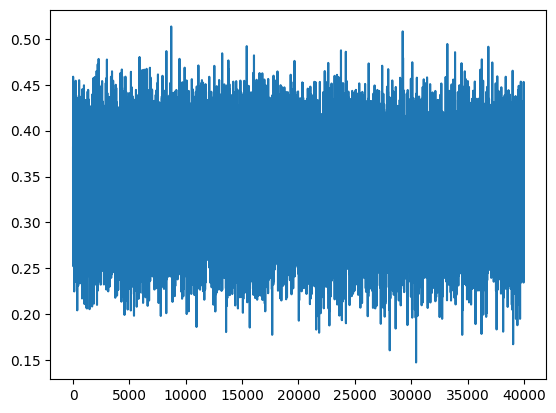

In [12]:
import matplotlib.pyplot as plt
plt.plot(lossi)

In [51]:
#batch normalization
#standardize hidden layers so that they are just gaussian

#Let's train a deeper network

class Linear:
  def __init__(self,fan_in,fan_out,bias=True):
    self.weight = torch.randn((fan_in,fan_out),generator=g) / fan_in**0.5
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self,x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])

class BatchNorm1d:

  def __init__(self,dim,eps=1e-5,momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    #parameters (trained using backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    #parameters (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self,x):
    if self.training:
      xmean = x.mean(0,keepdim=True)
      xvar = x.var(0,unbiased=False,keepdim=True)

    else:
      xmean = self.running_mean
      xvar = self.running_var

    xhat = (x - xmean) / torch.sqrt(xvar + self.eps)
    self.out = self.gamma * xhat + self.beta

    if self.training:
      with torch.no_grad():
        self.running_mean = (1-self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1-self.momentum) * self.running_var + self.momentum * xvar

    return self.out

  def parameters(self):
    return [self.gamma,self.beta]

class Tanh:
  def __call__(self,x):
    self.out = torch.tanh(x)
    return self.out

  def parameters(self):
    return []

n_embd = 10
n_hidden = 100

g = torch.Generator().manual_seed(2147483647)
vocab_size = 27

C = torch.randn((vocab_size,n_embd),generator=g)
layers = [
    Linear(n_embd*block_size,n_hidden), Tanh(),
    Linear(n_hidden,n_hidden),BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden,n_hidden),BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden,n_hidden),BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden,n_hidden),BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden,n_hidden),BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden,vocab_size),BatchNorm1d(vocab_size),
]

with torch.no_grad():
  layers[-1].gamma *= 0.1 #scale down the last layer

  for layer in layers[:-1]:
    if isinstance(layer,Linear):
      layer.weight *= 5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters))
for p in parameters:
  p.requires_grad = True



57651


In [65]:
max_steps = 200000
batch_size = 32
lossi = []
ud = []

for i in range(max_steps):
  #sample a batch
  ix = torch.randint(0,Xtr.shape[0],(batch_size,))
  Xb,Yb = Xtr[ix],Ytr[ix]

  #forward pass
  emb = C[Xb]
  x = emb.view(emb.shape[0],-1)
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x,Yb)
  #backward pass
  for layer in layers:
    layer.out.retain_grad()
  for p in parameters:
    p.grad = None
  loss.backward()


  #update
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    if p.grad is not None:
      p.data += -lr * p.grad
  #track stats
  lossi.append(loss.log10().item())
  ud.append([((lr * p.grad).std()/p.data.std()).log10().item() for p in parameters])

  if i % 50000 == 0:
    print(f'{i}: {loss.item()}')

0: 3.3217005729675293
50000: 2.2815873622894287
100000: 1.714936375617981


KeyboardInterrupt: 

In [66]:
#testing
emb = C[Xte]
x = emb.view(emb.shape[0],-1)
for layer in layers:
  x = layer(x)
loss = F.cross_entropy(x,Yte)
print(loss.item())

2.085817337036133


In [72]:
#folding gamma and beta to previous layers
def fold_params(layers):

  offset = 0
  for i,layer in enumerate(layers):
    if isinstance(layer,Linear) and isinstance(layers[i+1],BatchNorm1d):
      W_new = layer.weight * (layers[i+1].gamma) / torch.sqrt(layers[i+1].running_var + 1e-8)
      b_new = (layer.bias - layers[i+1].running_mean) * layers[i+1].gamma / torch.sqrt(layers[i+1].running_var + 1e-8) + layers[i+1].beta
      layer.weight = W_new
      layer.bias = b_new
      print(layer.weight.shape)


fold_params(layers)
emb = C[Xte]
x = emb.view(emb.shape[0],-1)
for layer in layers:
  if not isinstance(layer,BatchNorm1d):
    x = layer(x)
loss = F.cross_entropy(x,Yte)
print(loss.item())






torch.Size([100, 100])
torch.Size([100, 100])
torch.Size([100, 100])
torch.Size([100, 100])
torch.Size([100, 100])
torch.Size([100, 27])
2.089090585708618


layer 1 (      Tanh): mean -0.04, std 0.76, saturated: 21.91%
layer 4 (      Tanh): mean -0.00, std 0.64, saturated: 2.56%
layer 7 (      Tanh): mean -0.00, std 0.64, saturated: 2.62%
layer 10 (      Tanh): mean +0.00, std 0.64, saturated: 3.12%
layer 13 (      Tanh): mean +0.00, std 0.64, saturated: 2.97%
layer 16 (      Tanh): mean -0.00, std 0.64, saturated: 2.94%


Text(0.5, 1.0, 'activation distribution')

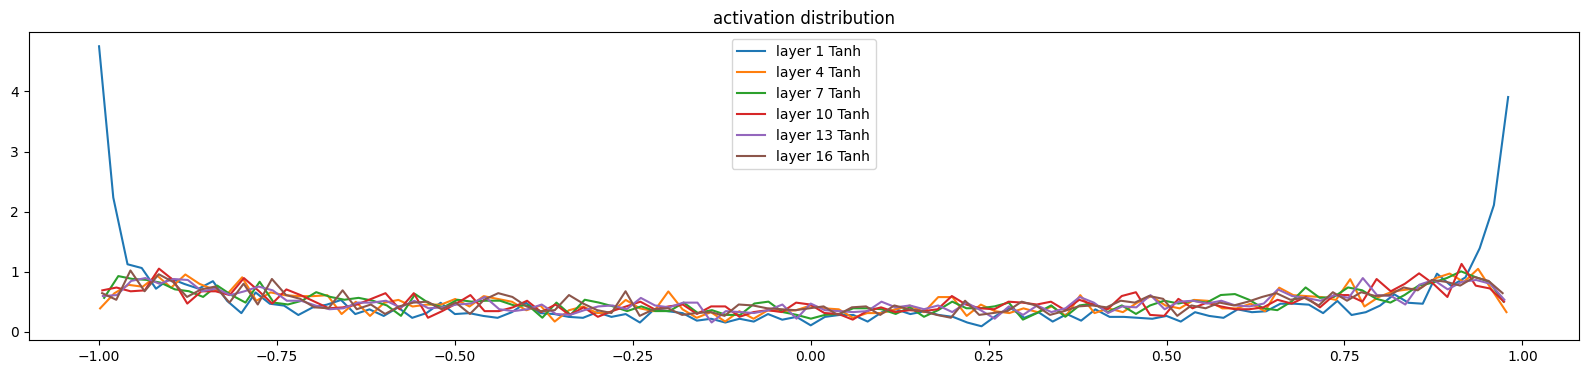

In [36]:
plt.figure(figsize=(20,4)) #width and height of the plot
#stablize standard deviation with reasonable saturation (reduces to 0 more squashing, very high- takes extreme values so appropriate gain is required)
legends = []
for i,layer in enumerate(layers[:-1]):
  if isinstance(layer,Tanh):
    t = layer.out
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
    hy,hx = torch.histogram(t,density=True)
    plt.plot(hx[:-1].detach(),hy.detach())
    legends.append(f'layer {i} {layer.__class__.__name__}')
plt.legend(legends)
plt.title('activation distribution')

layer 1 (      Tanh): mean +0.000000, std 8.549679e-04
layer 4 (      Tanh): mean +0.000000, std 8.481033e-04
layer 7 (      Tanh): mean +0.000000, std 7.719346e-04
layer 10 (      Tanh): mean +0.000000, std 6.747831e-04
layer 13 (      Tanh): mean +0.000000, std 6.120005e-04
layer 16 (      Tanh): mean -0.000000, std 5.453548e-04


Text(0.5, 1.0, 'gradient distribution')

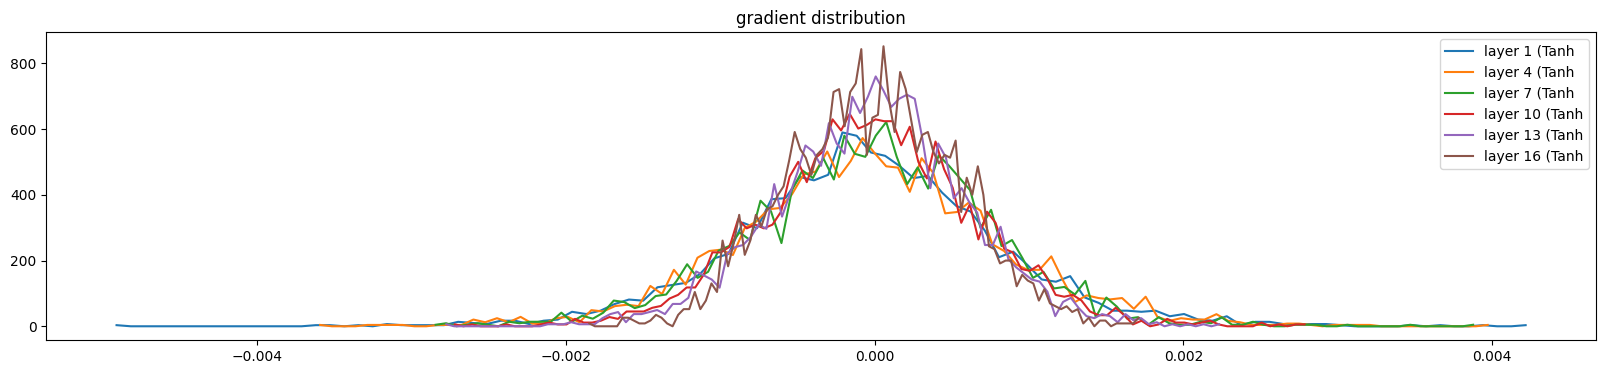

In [37]:
#watch tanh activation, linear activation, gradients, weight gradient distribution,updates to data (make sure too much above 1e-3)

#make sure the gradients in all layers are roughly the same
#without tanh, linear layers are giant sandwich on top of each other, so 1 is good bn gain
#collapses into single layer , linear transformation
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('gradient distribution')

weight   (27, 10) | mean +0.000049 | std 2.495512e-03 | grad:data ratio 2.493702e-03
weight  (30, 100) | mean +0.000040 | std 2.453942e-03 | grad:data ratio 7.868621e-03
weight (100, 100) | mean -0.000008 | std 2.149407e-03 | grad:data ratio 1.293884e-02
weight (100, 100) | mean +0.000041 | std 1.965807e-03 | grad:data ratio 1.170930e-02
weight (100, 100) | mean +0.000012 | std 1.808151e-03 | grad:data ratio 1.081549e-02
weight (100, 100) | mean +0.000024 | std 1.679386e-03 | grad:data ratio 1.003555e-02
weight (100, 100) | mean -0.000013 | std 1.615553e-03 | grad:data ratio 9.798588e-03
weight  (100, 27) | mean +0.000002 | std 2.570459e-03 | grad:data ratio 1.538447e-02


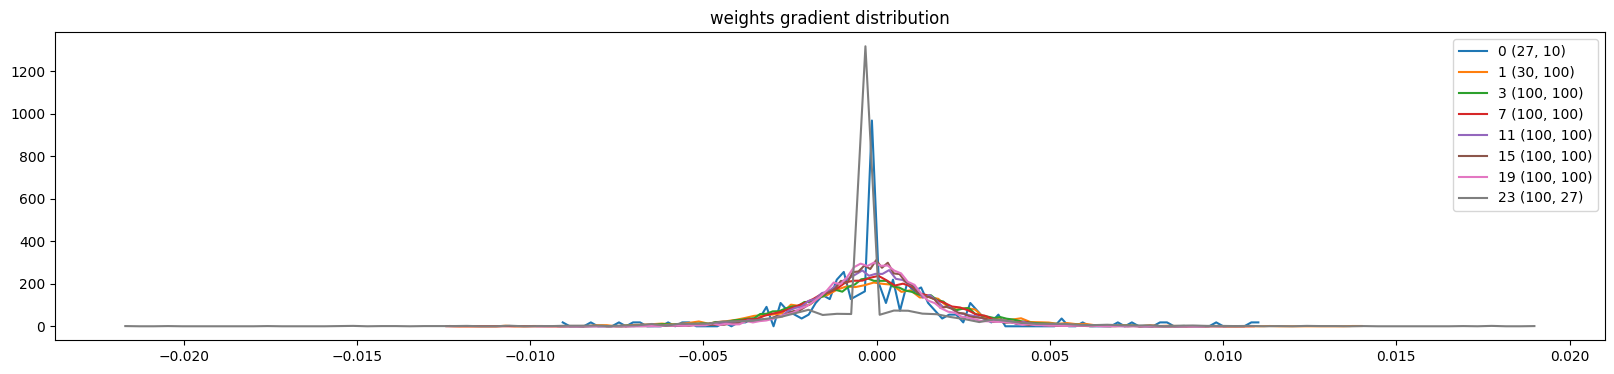

In [38]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i,p in enumerate(parameters):
  t = p.grad
  if p.ndim == 2:
    print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution');

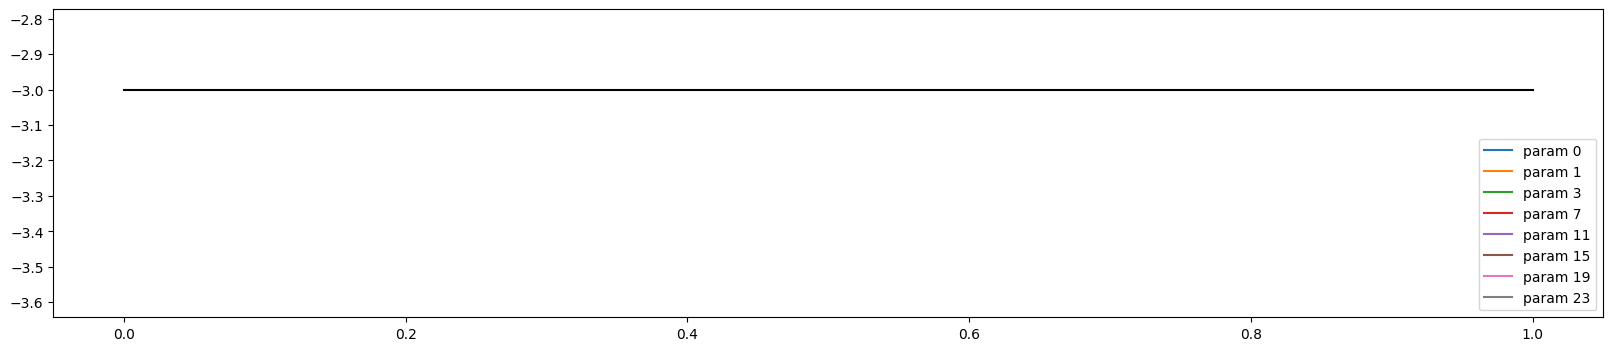

In [39]:
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);

In [ ]:
# Useful links:
# - "Kaiming init" paper: https://arxiv.org/abs/1502.01852
# - BatchNorm paper: https://arxiv.org/abs/1502.03167
# - Bengio et al. 2003 MLP language model paper (pdf): https://www.jmlr.org/papers/volume3/b...
# - Good paper illustrating some of the problems with batchnorm in practice: https://arxiv.org/abs/2105.07576

# Exercises:
# - E01: I did not get around to seeing what happens when you initialize all weights and biases to zero. Try this and train the neural net.
# You might think either that 1) the network trains just fine or 2) the network doesn't train at all, but actually it is 3) the network trains but only partially, and achieves a pretty bad final performance. Inspect the gradients and activations to figure out what is happening and why the network is only partially training, and what part is being trained exactly.
# - E02: BatchNorm, unlike other normalization layers like LayerNorm/GroupNorm etc. has the big advantage that after training, the batchnorm gamma/beta can be "folded into" the weights of the preceeding Linear layers, effectively erasing the need to forward it at test time. Set up a small 3-layer MLP with batchnorms,
# train the network, then "fold" the batchnorm gamma/beta into the preceeding Linear layer's W,b by creating a new W2, b2 and erasing the batch norm. Verify that this gives the same forward pass during inference. i.e. we see that the batchnorm is there just for stabilizing the training, and can be thrown out after training is done! pretty cool.